MSBD5001 Final Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#csv_path = '/content/drive/MyDrive/Colab Notebooks/MSBD5001/weatherAUS.csv'
#df = pd.read_csv(csv_path)

Mounted at /content/drive


In [ ]:
# unpickle cifar10 images
def unpickle(file):
  import pickle
  with open(file, 'rb') as fo:
      dict = pickle.load(fo, encoding='bytes')
  return dict


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')


102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/MSBD5001/bird.png'
img = image.load_img(img_path, target_size=(224, 224))

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n01558993', 'robin', 0.9982198), ('n04604644', 'worm_fence', 0.00091889955), ('n01530575', 'brambling', 0.00038571496)]


In [ ]:
# visualize feature maps output from each block in the vgg model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model


In [ ]:
# summarize feature map size for each conv layer
from matplotlib import pyplot
# load the model
model = ResNet50()
count = 0
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	count+=1
	print(i, layer.name, layer.output.shape)
print("number of convolutional layer is",count)

1 conv1_pad (None, 230, 230, 3)
2 conv1_conv (None, 112, 112, 64)
3 conv1_bn (None, 112, 112, 64)
4 conv1_relu (None, 112, 112, 64)
7 conv2_block1_1_conv (None, 56, 56, 64)
8 conv2_block1_1_bn (None, 56, 56, 64)
9 conv2_block1_1_relu (None, 56, 56, 64)
10 conv2_block1_2_conv (None, 56, 56, 64)
11 conv2_block1_2_bn (None, 56, 56, 64)
12 conv2_block1_2_relu (None, 56, 56, 64)
13 conv2_block1_0_conv (None, 56, 56, 256)
14 conv2_block1_3_conv (None, 56, 56, 256)
15 conv2_block1_0_bn (None, 56, 56, 256)
16 conv2_block1_3_bn (None, 56, 56, 256)
17 conv2_block1_add (None, 56, 56, 256)
18 conv2_block1_out (None, 56, 56, 256)
19 conv2_block2_1_conv (None, 56, 56, 64)
20 conv2_block2_1_bn (None, 56, 56, 64)
21 conv2_block2_1_relu (None, 56, 56, 64)
22 conv2_block2_2_conv (None, 56, 56, 64)
23 conv2_block2_2_bn (None, 56, 56, 64)
24 conv2_block2_2_relu (None, 56, 56, 64)
25 conv2_block2_3_conv (None, 56, 56, 256)
26 conv2_block2_3_bn (None, 56, 56, 256)
27 conv2_block2_add (None, 56, 56, 256)
28 

1/1 [==============================] - 0s 225ms/step


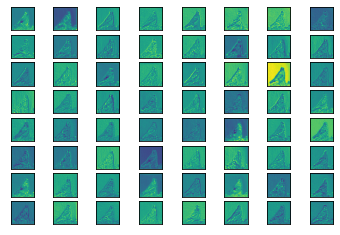

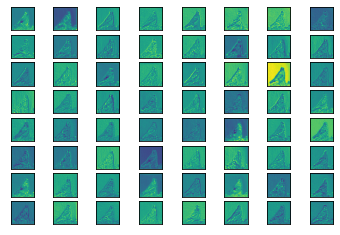

In [ ]:
# redefine model to output right after the first hidden layer
ixs = [29,30]
outputs = [model.layers[i].output for i in ixs]
model0 = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('/content/drive/MyDrive/Colab Notebooks/MSBD5001/bird.png', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model0.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1])
			ix += 1
	# show the figure
	pyplot.show()

In [ ]:
print(model.layers[29].output)
print(model.layers[30].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 56, 56, 64), dtype=tf.float32, name=None), name='conv2_block3_1_conv/BiasAdd:0', description="created by layer 'conv2_block3_1_conv'")
KerasTensor(type_spec=TensorSpec(shape=(None, 56, 56, 64), dtype=tf.float32, name=None), name='conv2_block3_1_bn/FusedBatchNormV3:0', description="created by layer 'conv2_block3_1_bn'")


1/1 [==============================] - 0s 424ms/step


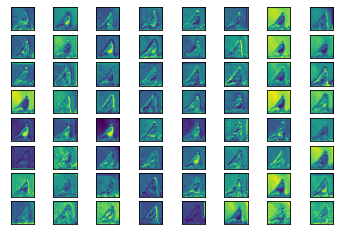

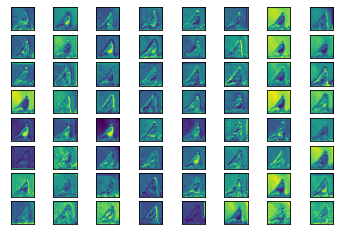

In [ ]:
# redefine model to output right after the first hidden layer
ixs = [61,62]
outputs = [model.layers[i].output for i in ixs]
model1 = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('/content/drive/MyDrive/Colab Notebooks/MSBD5001/bird.png', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model1.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1])
			ix += 1
	# show the figure
	pyplot.show()

In [ ]:
print(model.layers[61].output)
print(model.layers[62].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 128), dtype=tf.float32, name=None), name='conv3_block3_1_conv/BiasAdd:0', description="created by layer 'conv3_block3_1_conv'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 128), dtype=tf.float32, name=None), name='conv3_block3_1_bn/FusedBatchNormV3:0', description="created by layer 'conv3_block3_1_bn'")


1/1 [==============================] - 1s 822ms/step


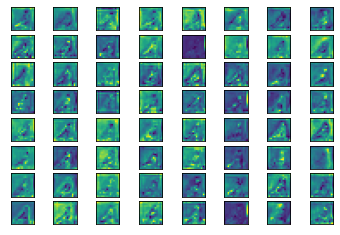

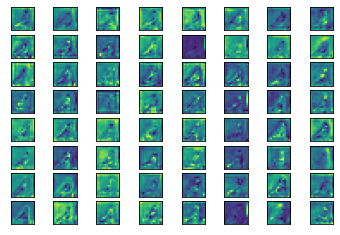

In [ ]:
# redefine model to output right after the first hidden layer
ixs = [123,124]
outputs = [model.layers[i].output for i in ixs]
model2 = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('/content/drive/MyDrive/Colab Notebooks/MSBD5001/bird.png', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model2.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1])
			ix += 1
	# show the figure
	pyplot.show()

In [ ]:
print(len(model.layers))
print(model2.layers[124].output)
print(model2.layers[124].output)

177
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 256), dtype=tf.float32, name=None), name='conv4_block5_1_bn/FusedBatchNormV3:0', description="created by layer 'conv4_block5_1_bn'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 256), dtype=tf.float32, name=None), name='conv4_block5_1_bn/FusedBatchNormV3:0', description="created by layer 'conv4_block5_1_bn'")


1/1 [==============================] - 1s 1s/step


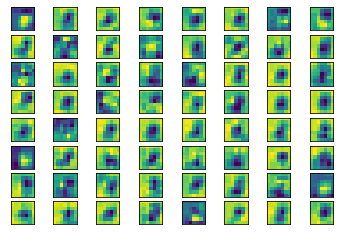

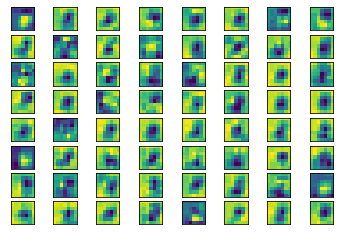

In [ ]:
# redefine model to output right after the first hidden layer
ixs = [168,169]
outputs = [model.layers[i].output for i in ixs]
model3 = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('/content/drive/MyDrive/Colab Notebooks/MSBD5001/bird.png', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model3.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1])
			ix += 1
	# show the figure
	pyplot.show()

Next, we need a clearer idea of the shape of the feature maps output by each of the convolutional layers and the layer index number so that we can retrieve the appropriate layer output.

The example below will enumerate all layers in the model and print the output size or feature map size for each convolutional layer as well as the layer index in the model.